## Decision Tree

#### What are Decision Trees?

* A Decision Tree (DT) is a supervised learning algorithm used for both classification and regression tasks. It mimics human decision-making by splitting data into branches based on specific conditions, ultimately leading to a prediction.

* Each node in the tree represents a decision point based on a feature, while each branch represents an outcome of the decision. The leaves of the tree hold the final predictions.

#### Applications of Decision Trees:

**Classification Tasks:** Categorizing emails into spam or not spam.  
**Regression Tasks:** Predicting housing prices.  
**Feature Importance Analysis:** Identifying critical factors in a dataset.  
**Customer Segmentation:** Grouping customers based on buying behaviors.

#### How Decision Trees Work

**Root Node Selection:**
* The algorithm starts by identifying the feature that best splits the data into subsets with minimal impurity.

**Splitting:**
* At each node, the data is split based on a condition that maximizes Information Gain (or minimizes impurity like GINI).

**Recursive Process:**
* The process continues recursively until:
(a) A stopping criterion is met (e.g., maximum depth).
(b) A node becomes "pure" (contains data points of a single class).

**Prediction:**
* New data is passed down the tree, following the splits, until it reaches a leaf node, which contains the prediction.

#### Key Metrics for Splitting

1. **Entropy**:

   Measures the impurity or randomness in the dataset.
   Formula:

   $$ H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i) $$

   Where \( p_i \) is the proportion of samples in class \( i \).

2. **GINI Index**:

   Measures the likelihood of incorrect classification.
   Formula:

   $$ GINI = 1 - \sum_{i=1}^{c} p_i^2 $$

   Where \( p_i \) is the proportion of samples in class \( i \).

3. **Information Gain (IG)**:

   Quantifies how much a split reduces uncertainty.
   Formula:

   $$ IG = H(Parent) - \sum_{k=1}^{n} \frac{|Subset_k|}{|Parent|} \cdot H(Subset_k) $$



#### Example: Evaluating a Split Using GINI and Information Gain

Assume we have 10 data points with the following class distribution:

- **Parent Node**: 6 "Yes", 4 "No"

The GINI index for the **Parent Node** is calculated as:

$$ GINI(Parent) = 1 - \left( (0.6)^2 + (0.4)^2 \right) = 0.48 $$

Now, let's split the data into two subsets:

- **Left Child**: 4 "Yes", 1 "No"

The GINI index for the **Left Child** is:

$$ GINI(Left) = 1 - \left( (0.8)^2 + (0.2)^2 \right) = 0.32 $$

- **Right Child**: 2 "Yes", 3 "No"

The GINI index for the **Right Child** is:

$$ GINI(Right) = 1 - \left( (0.4)^2 + (0.6)^2 \right) = 0.48 $$

The **Weighted GINI** after the split is calculated as:

$$ GINI_{Split} = \frac{5}{10} \cdot 0.32 + \frac{5}{10} \cdot 0.48 = 0.4 $$

Finally, the **Information Gain (IG)** is:

$$ IG = GINI(Parent) - GINI_{Split} = 0.48 - 0.4 = 0.08 $$

This shows the "goodness" of the split, with a higher Information Gain indicating a better split.


#### Why Infinite Trees Are Possible

**Continuous Features:** For numeric features, infinitely small splits can be made.  
**Overfitting:** Without constraints, the tree can grow until every data point has its own leaf, leading to overfitting.  
**Depth Control:** Real-world implementations limit tree depth to avoid overfitting and computational inefficiency.

* By using GINI or Entropy and Information Gain effectively, Decision Trees can split datasets optimally, ensuring a balance between simplicity and accuracy.

**(b)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from io import StringIO
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 3/Machine Learning/Assignment/Assignment 1/Iterating code/Train_Preprocessed.csv')

In [3]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,809.98,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
unique_counts = df.nunique()
print(unique_counts)

Month                            8
Age                             43
Occupation                      15
Annual_Income                13186
Num_Bank_Accounts               37
Num_Credit_Card                 41
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                   508
Delay_from_due_date            126
Num_of_Delayed_Payment         459
Changed_Credit_Limit          5813
Num_Credit_Inquiries           181
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            2
Total_EMI_per_month          12217
Amount_invested_monthly      94154
Payment_Behaviour                6
Monthly_Balance              93888
Unemployment_Rate                5
Credit_Score                     3
dtype: int64


In [6]:
y = df['Credit_Score']
# Assign integer labels to the Credit_Score column
y = y.map({'Good': 0, 'Poor': 1, 'Standard':2})

df =  df.drop(columns = ['Credit_Score'])

In [7]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,Good,809.98,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6


In [8]:
df = df.drop(columns=['Month'])

* Checking for type of values in the categorcial column, as I can determine whether the column as to label encoded or one hot encoded. 

In [9]:
# Find categorical columns in the dataframe
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Get unique values in each categorical column
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")

Unique values in 'Occupation': ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

Unique values in 'Type_of_Loan': ['Auto Loan, Credit-Builder Loan, Home Equity Loan, Personal Loan'
 'Credit-Builder Loan' 'Auto Loan, Not Specified' 'Not Specified'
 'No Loan' 'Credit-Builder Loan, Mortgage Loan'
 'Auto Loan, Not Specified, Student Loan'
 'Auto Loan, Debt Consolidation Loan, Personal Loan'
 'Not Specified, Payday Loan'
 'Auto Loan, Credit-Builder Loan, Personal Loan' 'Payday Loan'
 'Not Specified, Personal Loan, Student Loan'
 'Auto Loan, Home Equity Loan, Payday Loan, Personal Loan, Student Loan'
 'Auto Loan, Credit-Builder Loan, Not Specified, Student Loan'
 'Home Equity Loan, Payday Loan'
 'Credit-Builder Loan, Mortgage Loan, Not Specified, Payday Loan, Personal Loan'
 'Auto Loan, Debt Consolidation Loan, Mortgage Loan, Not Specified, Payday Loan'
 'Credit-Bui

* It can be observed that the columns **Credit_Mix** and **Payment_of_Min_Amount** is ordinal and hence, we can perform label encoding whereas other columns can be one hot encoded.

In [10]:
# Step 4: Label encoding for ordinal categorical columns
label_encoding_cols = [
    'Credit_Mix','Payment_of_Min_Amount'
]

label_encoders = {}
for col in label_encoding_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply label encoding
    label_encoders[col] = le  # Store label encoder if needed for inverse transformation

In [11]:
# One-hot encode 'Credit_Mix' and 'Payment_of_Min_Amount', but don't include 'Credit_Score' here.
df2 = pd.get_dummies(df, columns=['Type_of_Loan', 'Occupation', 'Payment_Behaviour'], drop_first=True)

In [12]:
# Get all categorical column names in df1
categorical_columns_df = ['Type_of_Loan', 'Occupation', 'Payment_Behaviour']

# Check if these columns exist in df2
existing_categorical_columns = [col for col in categorical_columns_df if col in df2.columns]

# Display the existing categorical columns in df2
print("Categorical columns from df that exist in df2:", existing_categorical_columns)

Categorical columns from df that exist in df2: []


* The above code shows that the original columns are not present in the dataset after one hot encoding.

In [13]:
df2.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,3.0,4.0,3,4,3.000000,7.0,11.27,4.0,...,False,False,True,False,False,False,True,False,False,False
1,23,19114.12,3.0,4.0,3,4,4.428571,6.0,11.27,4.0,...,False,False,True,False,False,False,False,True,False,False
2,23,19114.12,3.0,4.0,3,4,3.000000,7.0,10.27,4.0,...,False,False,True,False,False,False,False,False,True,False
3,23,19114.12,3.0,4.0,3,4,5.000000,4.0,6.27,4.0,...,False,False,True,False,False,False,False,False,False,True
4,23,19114.12,3.0,4.0,3,4,6.000000,6.0,11.27,4.0,...,False,False,True,False,False,True,False,False,False,False


In [14]:
X = df2

* We use SMOTEENN (a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors) to balance an imbalanced dataset by creating synthetic samples and removing noisy data. The balanced data is then split into training and testing sets for further modeling.

In [15]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

##### Performing Decision Tree

* To create three Random Forest models with different root nodes and variations, I first trained a model on the full dataset and identified the top 3 most important features using feature importances. For each subsequent model, I progressively dropped the most important feature(s), ensuring different root nodes in each tree. This approach simulates varying the dataset, indirectly influencing the structure of the decision trees in the Random Forest models while keeping other parameters constant.

In [16]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model with all features first
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Get indices of features sorted by importance (highest first)
sorted_idx = np.argsort(importances)[::-1]

# Print only top 3 feature importances
print("Top 3 Feature Importances:")
for idx in sorted_idx[:3]:  # Only loop through the top 3 features
    print(f"{X_train.columns[idx]}: {importances[idx]:.4f}")

Top 3 Feature Importances:
Credit_Mix: 0.0825
Outstanding_Debt: 0.0803
Interest_Rate: 0.0778


* It can be observed that the 3 best features in my dataset are:

1) Credit_Mix: 0.0825
2) Outstanding_Debt: 0.0803
3) Interest_Rate: 0.0778


Training Random Forest Model 1 
Random Forest Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12652
           1       0.97      0.95      0.96     11472
           2       0.96      0.89      0.92      8914

    accuracy                           0.95     33038
   macro avg       0.95      0.94      0.95     33038
weighted avg       0.95      0.95      0.95     33038

Random Forest Model 1 Accuracy: 0.9473
--------------------------------------------------


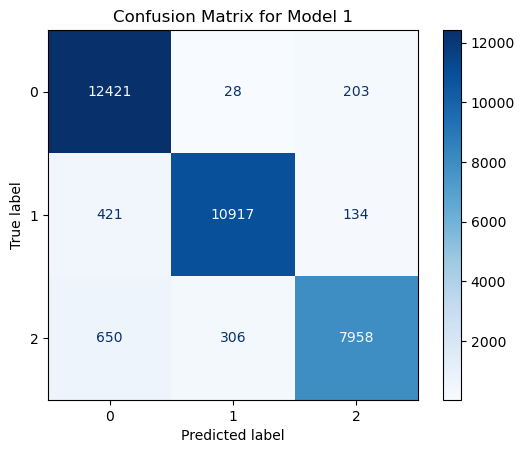

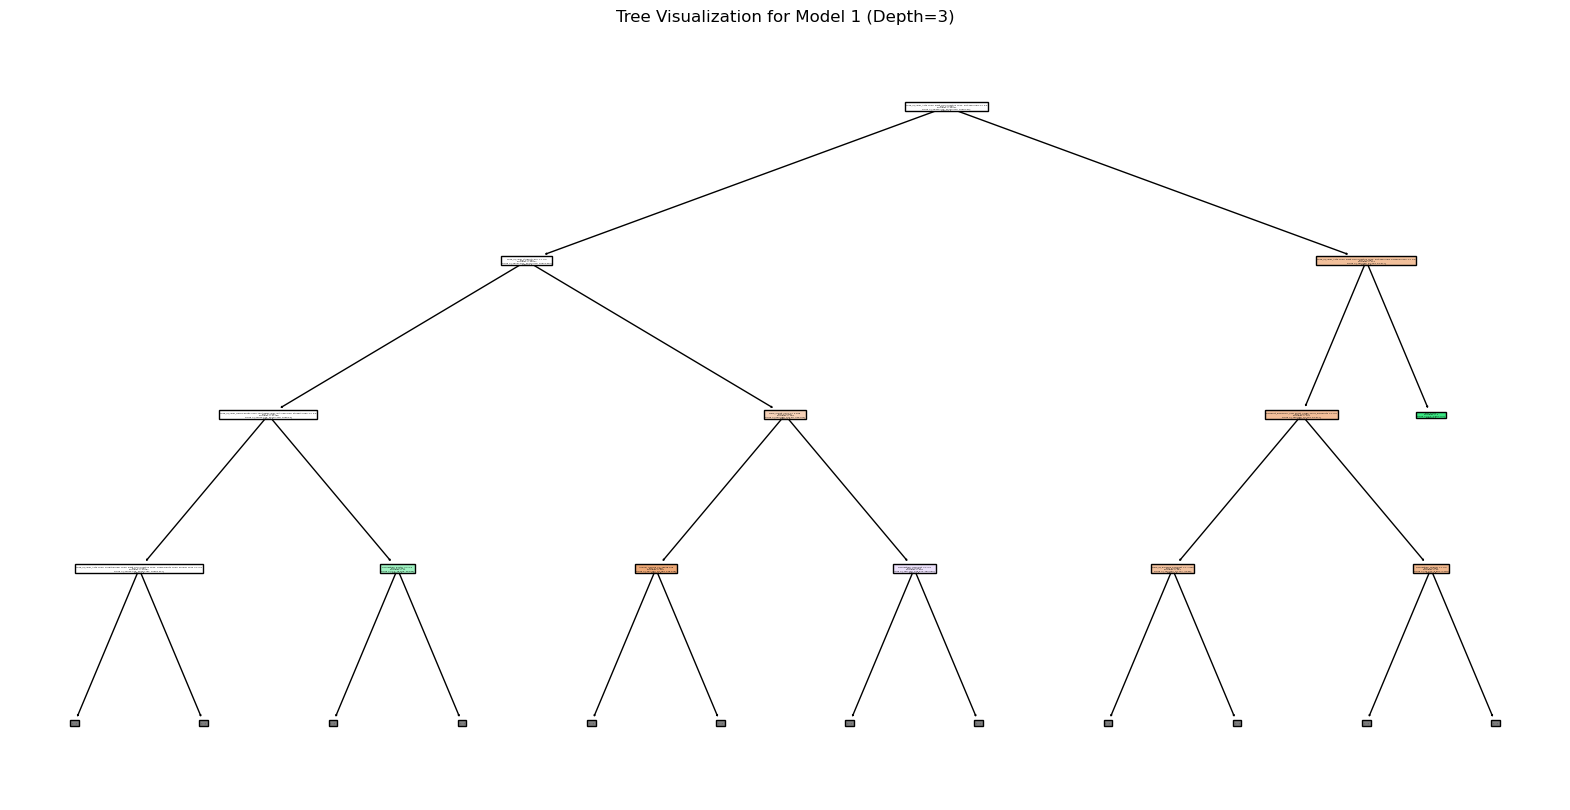


Training Random Forest Model 2 (Dropping Credit_Mix)...
Random Forest Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12652
           1       0.97      0.95      0.96     11472
           2       0.96      0.89      0.93      8914

    accuracy                           0.95     33038
   macro avg       0.95      0.94      0.95     33038
weighted avg       0.95      0.95      0.95     33038

Random Forest Model 2 Accuracy: 0.9475
--------------------------------------------------


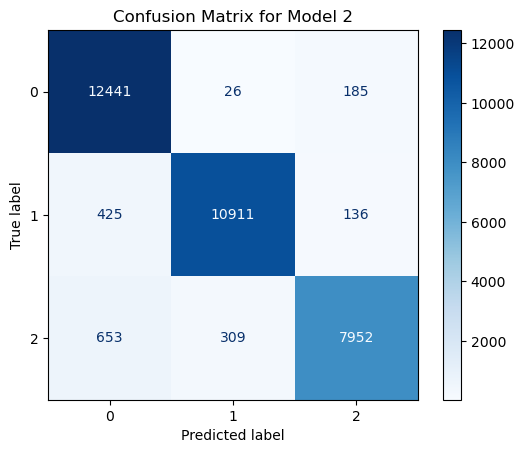

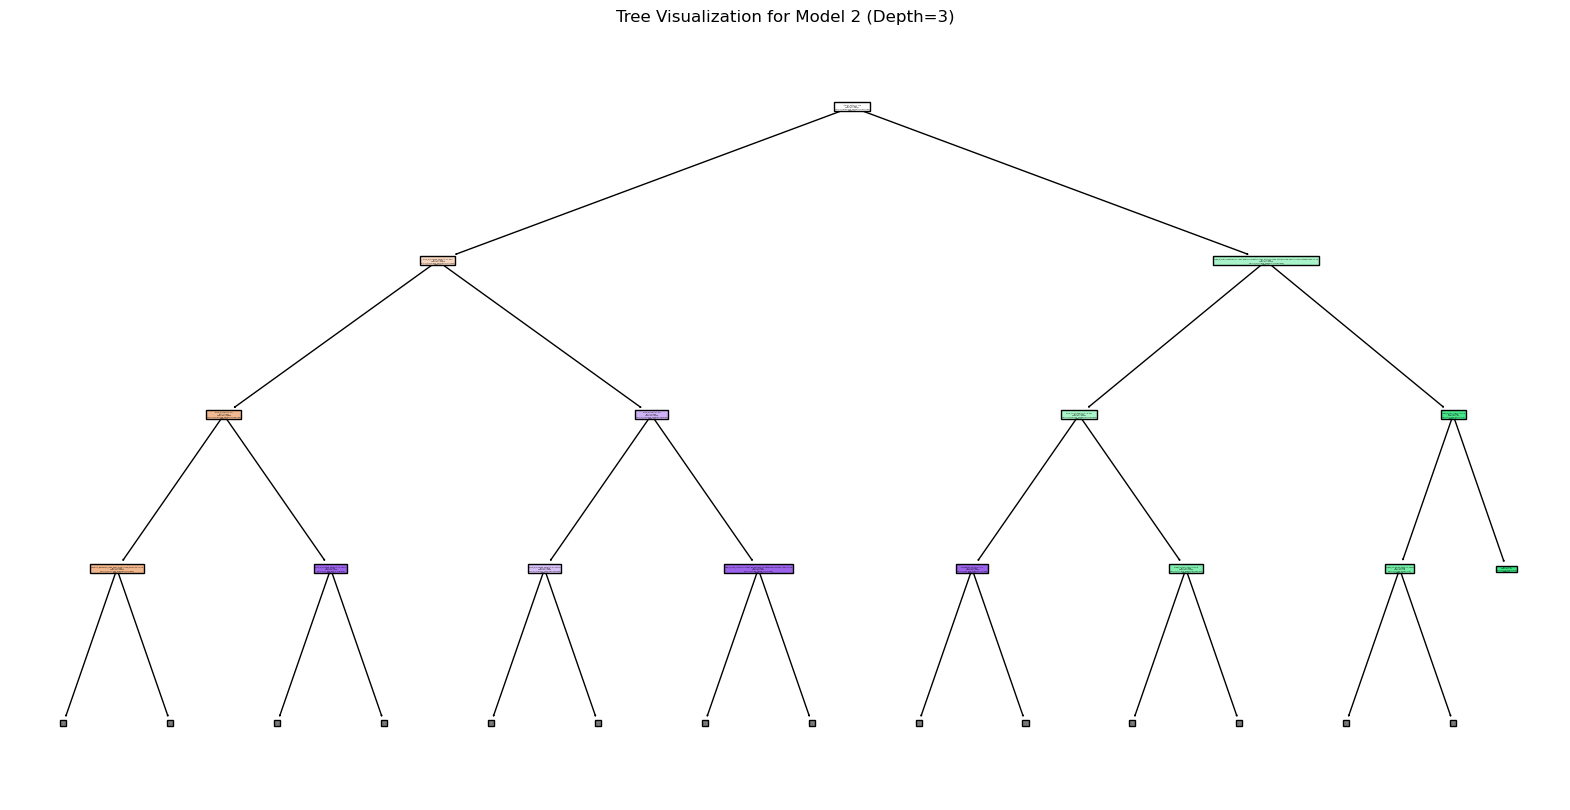


Training Random Forest Model 3 (Dropping Credit_Mix, Outstanding_Debt)...
Random Forest Model 3 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12652
           1       0.96      0.94      0.95     11472
           2       0.95      0.87      0.91      8914

    accuracy                           0.94     33038
   macro avg       0.94      0.93      0.94     33038
weighted avg       0.94      0.94      0.94     33038

Random Forest Model 3 Accuracy: 0.9396
--------------------------------------------------


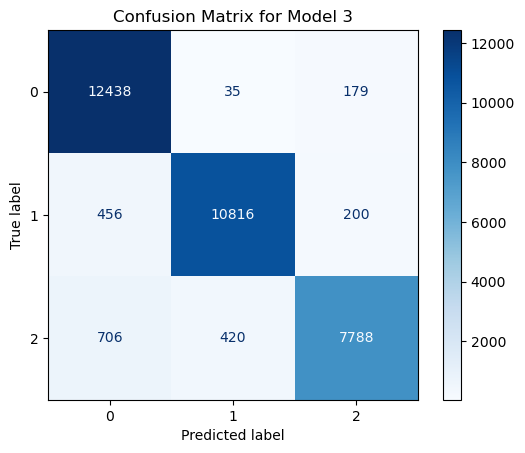

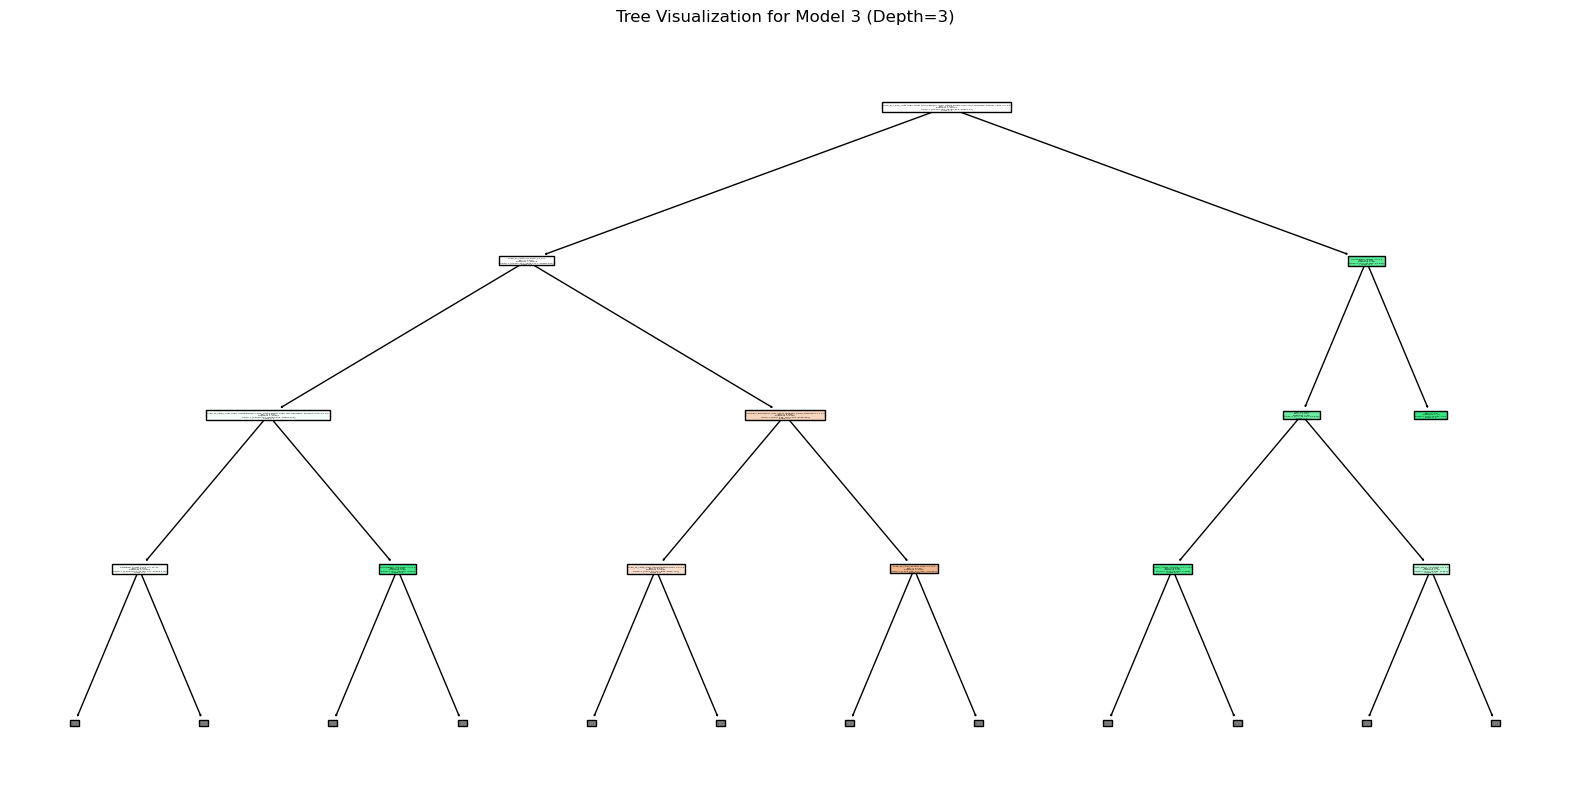

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Now train 3 models, dropping the most important features progressively
for i in range(3):
    # Drop the most important features for this model
    features_to_drop = X_train.columns[sorted_idx[:i]]  # Get the feature names to drop
    X_train_temp = X_train.drop(columns=features_to_drop)
    X_test_temp = X_test.drop(columns=features_to_drop)

    if i == 0:
        print(f"\nTraining Random Forest Model {i+1} ")
    else:
        print(f"\nTraining Random Forest Model {i+1} (Dropping {', '.join(features_to_drop)})...")

    # Train the model with the updated dataset
    rf_model.fit(X_train_temp, y_train)
    y_pred = rf_model.predict(X_test_temp)

    # Print classification report
    print(f"Random Forest Model {i+1} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Model {i+1} Accuracy: {accuracy:.4f}")
    print("-" * 50)  # Separator for better readability

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for Model {i+1}")
    plt.show()

    # Visualize one of the trees
    estimator = rf_model.estimators_[0]  # Pick the first tree from the forest
    plt.figure(figsize=(20, 10))
    plot_tree(
        estimator,
        feature_names=X_train_temp.columns,
        class_names=[str(c) for c in rf_model.classes_],  # Convert class labels to strings
        filled=True,
        max_depth=3
    )
    plt.title(f"Tree Visualization for Model {i+1} (Depth=3)")
    plt.show()

* Let's apply binning to the numeric features and evaluate if it improves the model's predictive performance.

In [18]:
# Annual Income
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, float('inf')]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']
df['Income_Binned'] = pd.cut(df['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Changed Credit Limit
credit_limit_bins = [-float('inf'), -10, 0, 5, 10, 15, 20, 25, float('inf')]
credit_limit_labels = ['< -10', '-10 to 0', '0-4', '5-9', '10-14', '15-19', '20-24', '25+']
df['Changed_Credit_Limit_Binned'] = pd.cut(df['Changed_Credit_Limit'], bins=credit_limit_bins, labels=credit_limit_labels, right=False)

# Outstanding Debt
debt_bins = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
debt_labels = ['0-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999', '5000+']
df['Outstanding_Debt_Binned'] = pd.cut(df['Outstanding_Debt'], bins=debt_bins, labels=debt_labels, right=False)

# Delay from Due Date
delay_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 75]
delay_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-39', '40-49', '50-59', '60+']
df['Delay_Binned'] = pd.cut(df['Delay_from_due_date'], bins=delay_bins, labels=delay_labels, right=False)

# Number of Delayed Payments
delayed_payment_bins = [0, 2, 5, 8, 10, 12, 15, 20, 30]
delayed_payment_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15-19', '20+']
df['Num_Delayed_Payment_Binned'] = pd.cut(df['Num_of_Delayed_Payment'], bins=delayed_payment_bins, labels=delayed_payment_labels, right=False)

# Number of Credit Inquiries
inquiries_bins = [0, 2, 5, 8, 10, 12, 15, float('inf')]
inquiries_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15+']
df['Num_Credit_Inquiries_Binned'] = pd.cut(df['Num_Credit_Inquiries'], bins=inquiries_bins, labels=inquiries_labels, right=False)

# Credit Utilization Ratio
util_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50]
util_labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']
df['Credit_Utilization_Ratio_Binned'] = pd.cut(df['Credit_Utilization_Ratio'], bins=util_bins, labels=util_labels, right=False)

# Credit History Age
history_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
history_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400+']
df['Credit_History_Age_Binned'] = pd.cut(df['Credit_History_Age'], bins=history_bins, labels=history_labels, right=False)

In [19]:
# Step 4: Label encoding for ordinal categorical columns
ordinal_cols = [
    'Income_Binned', 'Changed_Credit_Limit_Binned', 'Outstanding_Debt_Binned', 
    'Delay_Binned', 'Num_Delayed_Payment_Binned', 'Num_Credit_Inquiries_Binned', 
    'Credit_Utilization_Ratio_Binned', 'Credit_History_Age_Binned'
]

label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply label encoding
    label_encoders[col] = le  # Store label encoder if needed for inverse transformation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              100000 non-null  int64  
 1   Occupation                       100000 non-null  object 
 2   Annual_Income                    100000 non-null  float64
 3   Num_Bank_Accounts                100000 non-null  float64
 4   Num_Credit_Card                  100000 non-null  float64
 5   Interest_Rate                    100000 non-null  int64  
 6   Num_of_Loan                      100000 non-null  int64  
 7   Type_of_Loan                     100000 non-null  object 
 8   Delay_from_due_date              100000 non-null  float64
 9   Num_of_Delayed_Payment           100000 non-null  float64
 10  Changed_Credit_Limit             100000 non-null  float64
 11  Num_Credit_Inquiries             100000 non-null  float64
 12  Cre

In [21]:
# After creating the binned columns, drop the original columns
df.drop(columns=['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 
                 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 
                 'Credit_History_Age'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              100000 non-null  int64  
 1   Occupation                       100000 non-null  object 
 2   Num_Bank_Accounts                100000 non-null  float64
 3   Num_Credit_Card                  100000 non-null  float64
 4   Interest_Rate                    100000 non-null  int64  
 5   Num_of_Loan                      100000 non-null  int64  
 6   Type_of_Loan                     100000 non-null  object 
 7   Credit_Mix                       100000 non-null  int64  
 8   Payment_of_Min_Amount            100000 non-null  int64  
 9   Total_EMI_per_month              100000 non-null  float64
 10  Amount_invested_monthly          100000 non-null  float64
 11  Payment_Behaviour                100000 non-null  object 
 12  Mon

In [23]:
df3 = pd.get_dummies(df) 
# One-hot encode 'Credit_Mix' and 'Payment_of_Min_Amount', but don't include 'Credit_Score' here.
df3 = pd.get_dummies(df, columns=['Income_Binned', 'Changed_Credit_Limit_Binned', 'Outstanding_Debt_Binned', 
    'Delay_Binned', 'Num_Delayed_Payment_Binned', 'Num_Credit_Inquiries_Binned', 
    'Credit_Utilization_Ratio_Binned', 'Credit_History_Age_Binned','Type_of_Loan', 'Occupation', 'Payment_Behaviour'], drop_first=True)

In [24]:
# Get all categorical column names in df1
categorical_columns_df = ['Income_Binned', 'Changed_Credit_Limit_Binned', 'Outstanding_Debt_Binned', 
    'Delay_Binned', 'Num_Delayed_Payment_Binned', 'Num_Credit_Inquiries_Binned', 
    'Credit_Utilization_Ratio_Binned', 'Credit_History_Age_Binned', 'Type_of_Loan', 'Occupation', 'Payment_Behaviour']

# Check if these columns exist in df2
existing_categorical_columns = [col for col in categorical_columns_df if col in df2.columns]

# Display the existing categorical columns in df2
print("Categorical columns from df that exist in df3:", existing_categorical_columns)

Categorical columns from df that exist in df3: []


In [25]:
X = df3

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 590 entries, Age to Payment_Behaviour_Low_spent_Small_value_payments
dtypes: bool(579), float64(6), int64(5)
memory usage: 63.6 MB


In [27]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [28]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model with all features first
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Get indices of features sorted by importance (highest first)
sorted_idx = np.argsort(importances)[::-1]

# Print only top 3 feature importances
print("Top 3 Feature Importances:")
for idx in sorted_idx[:3]:  # Only loop through the top 3 features
    print(f"{X_train.columns[idx]}: {importances[idx]:.4f}")

Top 3 Feature Importances:
Interest_Rate: 0.1014
Credit_Mix: 0.0982
Num_Bank_Accounts: 0.0514



Training Random Forest Model 1 
Random Forest Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11806
           1       0.95      0.91      0.93      9051
           2       0.87      0.74      0.80      3203

    accuracy                           0.92     24060
   macro avg       0.91      0.87      0.89     24060
weighted avg       0.92      0.92      0.92     24060

Random Forest Model 1 Accuracy: 0.9167
--------------------------------------------------


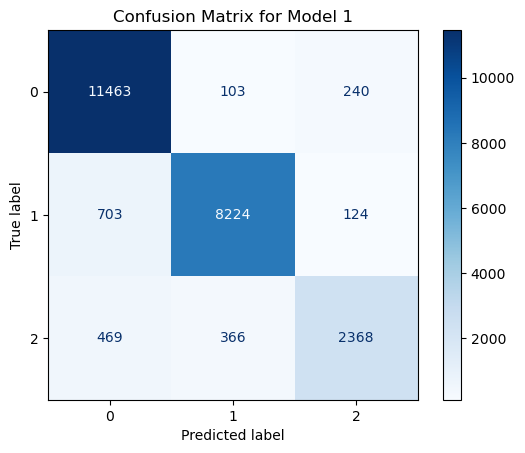

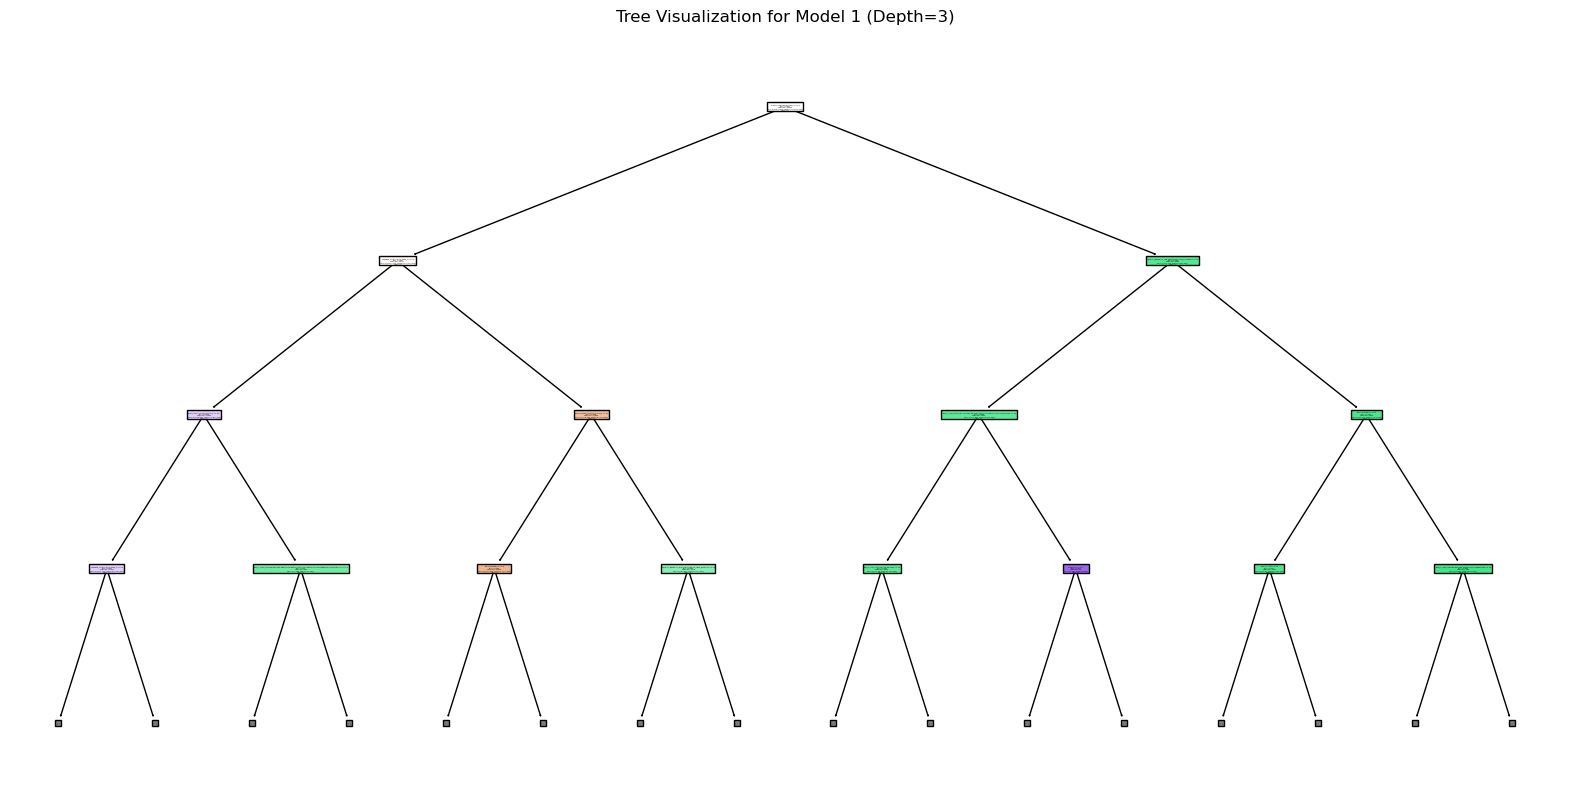


Training Random Forest Model 2 (Dropping Interest_Rate)...
Random Forest Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11806
           1       0.93      0.91      0.92      9051
           2       0.87      0.71      0.78      3203

    accuracy                           0.91     24060
   macro avg       0.90      0.86      0.88     24060
weighted avg       0.91      0.91      0.91     24060

Random Forest Model 2 Accuracy: 0.9123
--------------------------------------------------


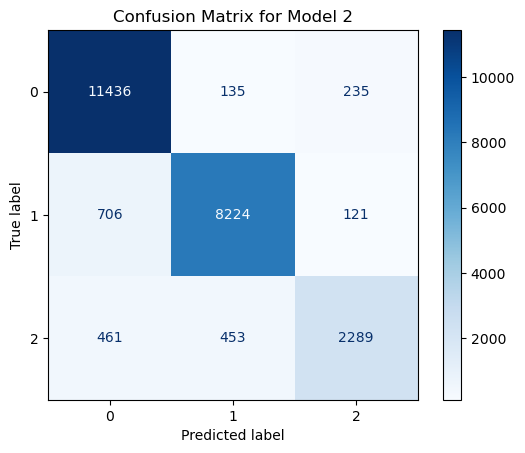

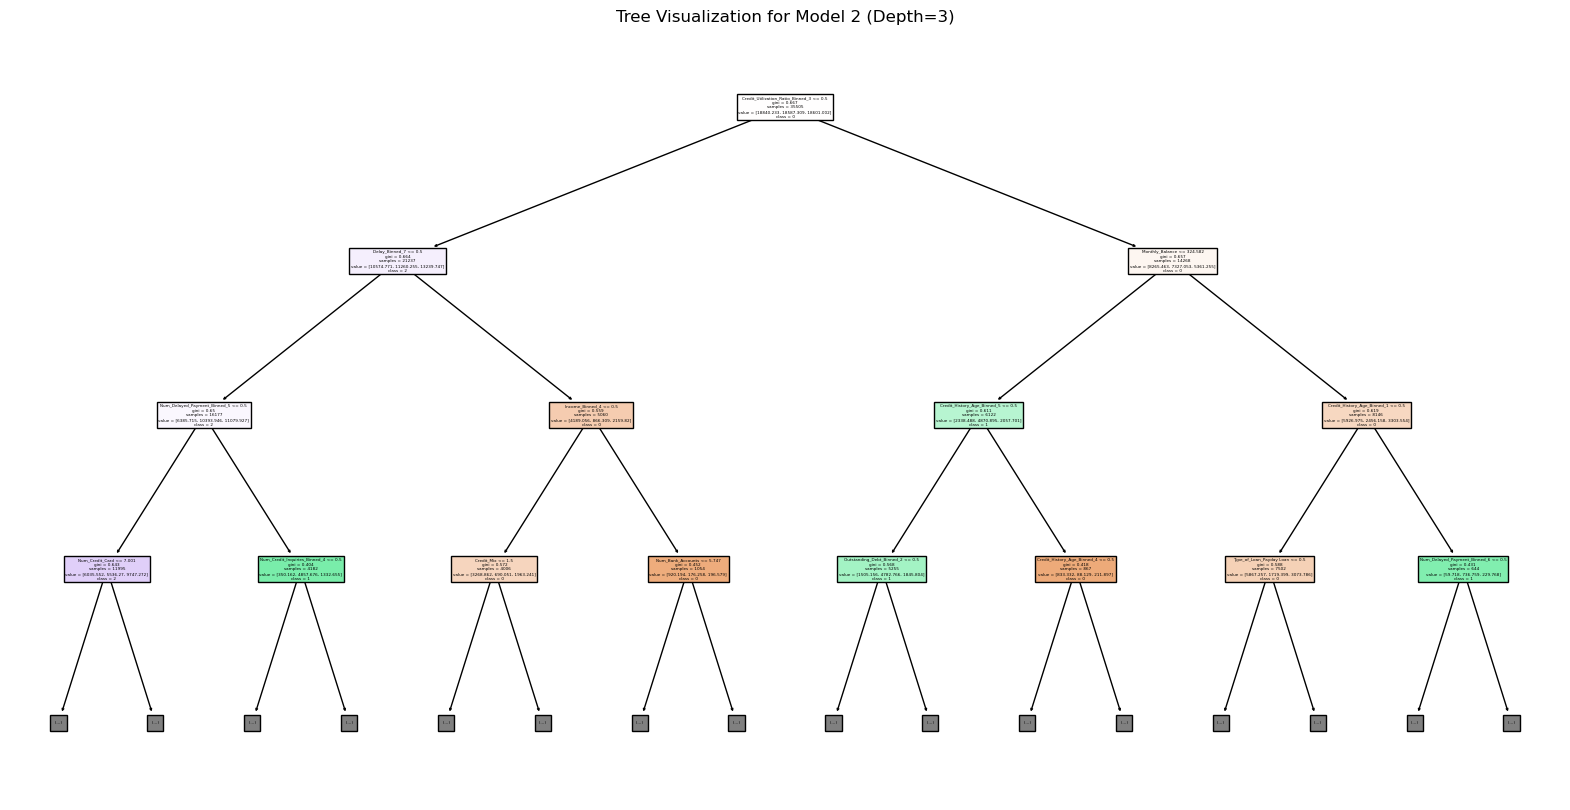


Training Random Forest Model 3 (Dropping Interest_Rate, Credit_Mix)...
Random Forest Model 3 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11806
           1       0.93      0.91      0.92      9051
           2       0.87      0.58      0.70      3203

    accuracy                           0.90     24060
   macro avg       0.89      0.82      0.85     24060
weighted avg       0.90      0.90      0.89     24060

Random Forest Model 3 Accuracy: 0.8975
--------------------------------------------------


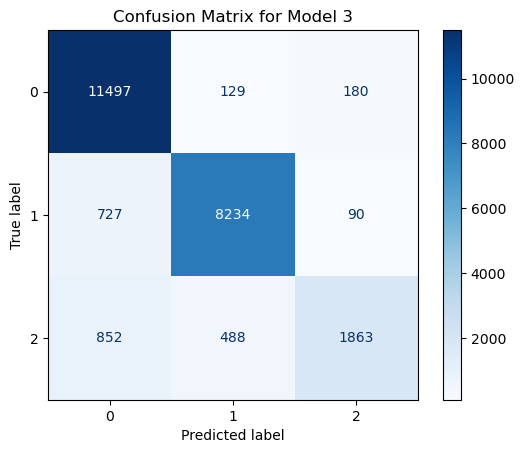

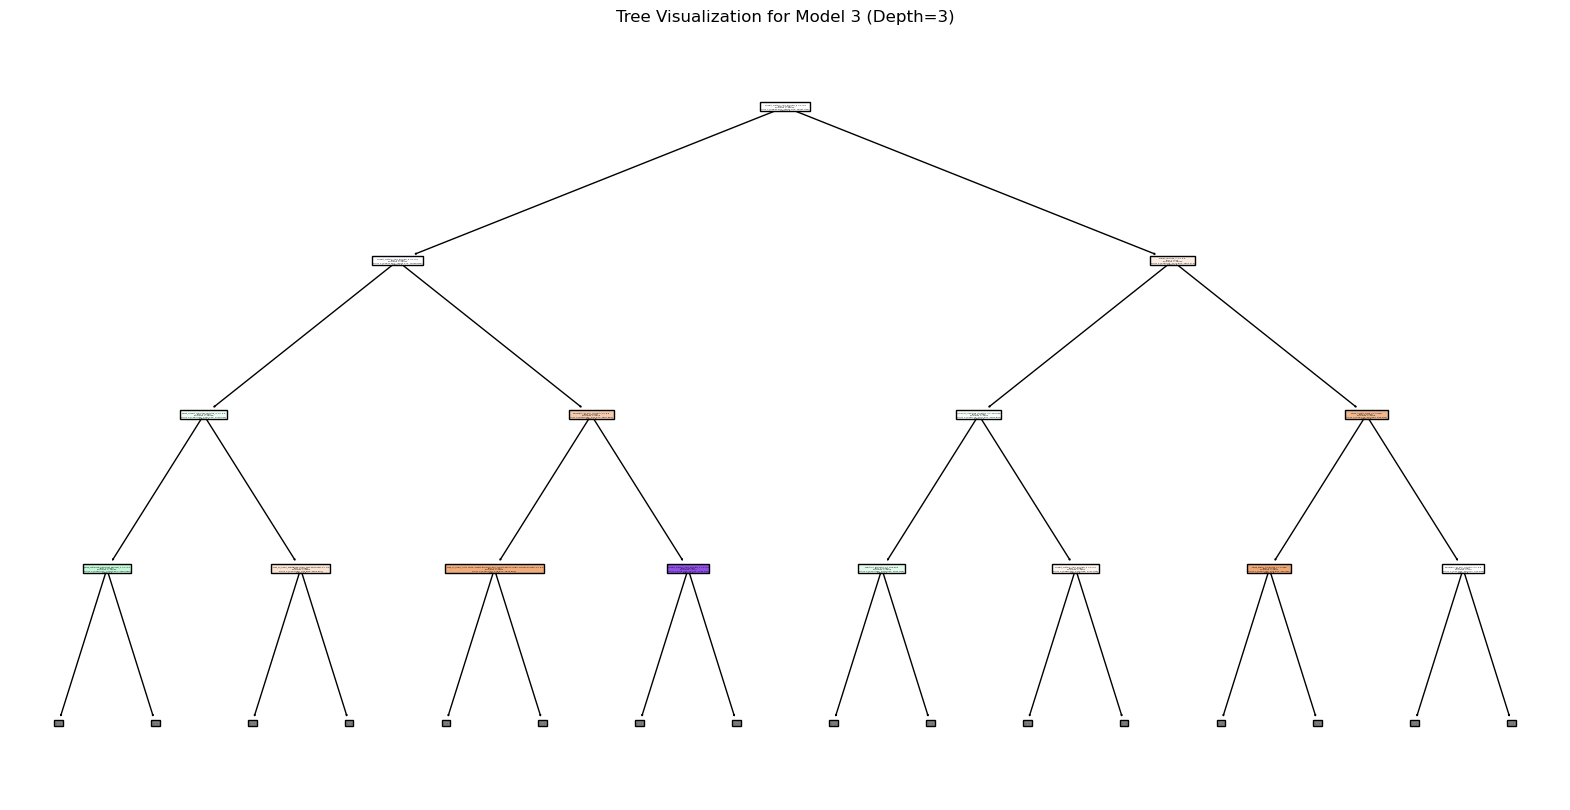

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Now train 3 models, dropping the most important features progressively
for i in range(3):
    # Drop the most important features for this model
    features_to_drop = X_train.columns[sorted_idx[:i]]  # Get the feature names to drop
    X_train_temp = X_train.drop(columns=features_to_drop)
    X_test_temp = X_test.drop(columns=features_to_drop)

    if i == 0:
        print(f"\nTraining Random Forest Model {i+1} ")
    else:
        print(f"\nTraining Random Forest Model {i+1} (Dropping {', '.join(features_to_drop)})...")

    # Train the model with the updated dataset
    rf_model.fit(X_train_temp, y_train)
    y_pred = rf_model.predict(X_test_temp)

    # Print classification report
    print(f"Random Forest Model {i+1} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Model {i+1} Accuracy: {accuracy:.4f}")
    print("-" * 50)  # Separator for better readability

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for Model {i+1}")
    plt.show()

    # Visualize one of the trees
    estimator = rf_model.estimators_[0]  # Pick the first tree from the forest
    plt.figure(figsize=(20, 10))
    plot_tree(
        estimator,
        feature_names=X_train_temp.columns,
        class_names=[str(c) for c in rf_model.classes_],  # Convert class labels to strings
        filled=True,
        max_depth=3
    )
    plt.title(f"Tree Visualization for Model {i+1} (Depth=3)")
    plt.show()


### Conclusion and Results

The analysis of the performance of various Random Forest models on the dataset has provided valuable insights into feature importance and the impact of feature selection on model accuracy.

#### Key Features:
The three most significant features in predicting the target variable, based on feature importance scores, were:
- **Credit_Mix**: 0.0825
- **Outstanding_Debt**: 0.0803
- **Interest_Rate**: 0.0778

These features were found to have the greatest contribution to the model's decision-making process, and their exclusion in certain models did lead to noticeable changes in performance.

#### Random Forest Model Results:
##### **Model 1 (All Features)**:
- **Accuracy**: 94.73%
- **Classification Report**:
  - Precision: 0.92 for class 0, 0.97 for class 1, and 0.96 for class 2.
  - Recall: 0.98 for class 0, 0.95 for class 1, and 0.89 for class 2.
  - F1-Score: 0.95 for class 0, 0.96 for class 1, and 0.92 for class 2.
- **Confusion Matrix**: The model correctly predicted most of the samples, with some misclassifications mainly occurring between class 1 and class 2.

##### **Model 2 (Dropping Credit_Mix)**:
- **Accuracy**: 94.75%
- **Classification Report**:
  - Precision: Similar to Model 1, with a slight drop for class 0 (0.91) but stable for other classes.
  - Recall: Almost identical to Model 1, with a slight drop in recall for class 2.
  - F1-Score: Consistent with Model 1.
- **Confusion Matrix**: Similar to Model 1, with slightly improved performance in the correct classification of class 1, although the misclassification for class 2 is still present.

##### **Model 3 (Dropping Credit_Mix and Outstanding_Debt)**:
- **Accuracy**: 93.96%
- **Classification Report**:
  - Precision and recall for class 0 remained strong (0.91 for precision, 0.98 for recall), but class 2 saw a more noticeable drop in performance.
  - The drop in recall for class 2 suggests that removing these important features had an adverse effect on distinguishing between the classes.
- **Confusion Matrix**: Similar to Model 2 but with a higher misclassification for class 2.

#### Models with Binning:
The models trained on binning numeric features had a lower overall accuracy compared to those using continuous features. However, they provided better precision and recall for class 0, which could be beneficial depending on the target application.

##### **Model 1 (Binned Data)**:
- **Accuracy**: 91.67%
- **Classification Report**:
  - Precision and recall remained quite strong for class 0 and class 1, though class 2 saw a decline in recall and f1-score.
- **Confusion Matrix**: There were notable misclassifications, especially between class 1 and class 2.

##### **Model 2 (Dropping Interest_Rate)**:
- **Accuracy**: 91.23%
- **Classification Report**:
  - Slight drop in precision for class 1 (0.93) and recall for class 2.
  - Model performance remained similar to Model 1.
- **Confusion Matrix**: Misclassifications remained consistent, with notable difficulty in predicting class 2.

##### **Model 3 (Dropping Interest_Rate and Credit_Mix)**:
- **Accuracy**: 89.75%
- **Classification Report**:
  - Precision for class 0 dropped to 0.88, and recall for class 2 dropped significantly, with precision at 0.87 and recall at 0.58.
  - The overall decrease in performance suggests that dropping both Credit_Mix and Interest_Rate caused the model to lose critical information needed to accurately classify all classes.
- **Confusion Matrix**: More misclassifications for class 2 were observed.

#### Conclusion:
- **Feature Importance**: Features like **Credit_Mix**, **Outstanding_Debt**, and **Interest_Rate** play a significant role in model accuracy and performance. Removing any of these features leads to a drop in overall accuracy and misclassification in some classes.
- **Binning Impact**: Binning numeric features caused a noticeable decrease in accuracy, especially for class 2, which suggests that the binning process oversimplified the data. It may have been more effective for specific applications (such as for predictive systems that need categorical interpretations) but not ideal for maximizing classification accuracy.
- **Model Comparison**: Models trained with all features (including continuous values) achieved the best performance, particularly **Model 1** with an accuracy of 94.73%. The removal of important features (like Credit_Mix and Outstanding_Debt) led to a drop in model performance, especially for class 2.

Based on these results, the **Random Forest Model 1 (with all features)** seems to be the best-performing model for classifying this dataset. However, further improvements can be made by fine-tuning the model's hyperparameters and potentially exploring other techniques, such as feature engineering or ensemble methods, to improve class 2's recall.
